In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

## Попробуем разные фильтры с целью - подсветить неоднородности керна

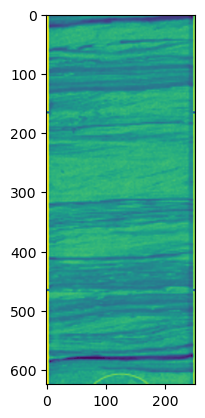

In [80]:
# Загрузка изображения керна

url_core_image = 'https://github.com/aleksandrbogdanovmsu/comp_vision_classes/blob/main/HW2%20-%20Filters/kore.png?raw=true'
response = requests.get(url_core_image)
gray_image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_image)

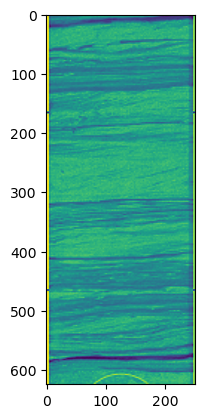

In [43]:
# 1. Фильтр повышения резкости
# Используем ядро Лапласиана для повышения резкости

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened_image = cv2.filter2D(gray_image, -1, sharpen_kernel)

plt.imshow(sharpened_image)

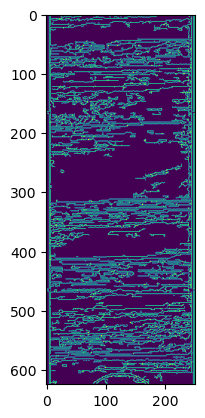

In [48]:
# 2. Фильтр выделения краев - может быть полезен для анализа слоистости и определения границ между различными минералами и структурами
# Применяем оператор Canny для выделения краев

edges = cv2.Canny(sharpened_image, threshold1=50, threshold2=180)

plt.imshow(edges)

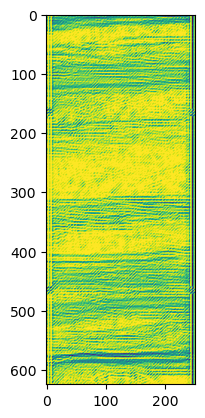

In [45]:
# 3. Фильтр текстурного анализа (Фильтр Габора)
# Устанавливаем параметры фильтра Габора

gabor_kernel = cv2.getGaborKernel((10, 10), 8.0, np.pi/4, 0.9, 0.4, 0, ktype=cv2.CV_32F)
gabor_image = cv2.filter2D(sharpened_image, cv2.CV_8UC3, gabor_kernel)

plt.imshow(gabor_image)

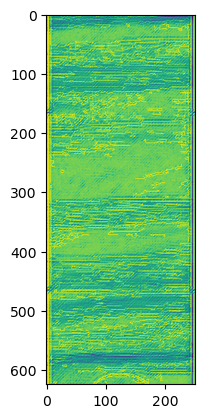

In [46]:
# Объединение результатов фильтров
# Используем взвешенное сложение для объединения изображений

combined_image = cv2.addWeighted(sharpened_image, 0.5, edges, 0.3, 0)
combined_image = cv2.addWeighted(combined_image, 0.9, gabor_image, 0.5, 0)

plt.imshow(combined_image)

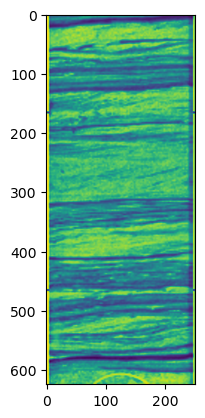

In [68]:
# 4. Контрастный фильтр для серых оттенков
# Используем CLAHE (Contrast Limited Adaptive Histogram Equalization) для улучшения контраста

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_image = clahe.apply(gray_image)

plt.imshow(contrast_image)

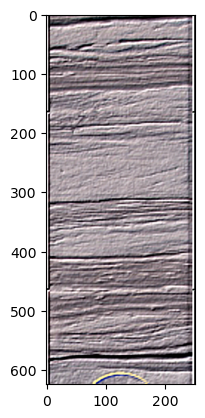

In [70]:
# 5. Фильтр рельефа (Emboss)

emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

emboss_image = cv2.filter2D(image, -1, emboss_kernel)
emboss_image = cv2.normalize(emboss_image, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(emboss_image)

## На мой взгляд отлично отработали фильтры для серых оттенков (в породе очень много серых оттенков) и фильтр рельефа - подсветил неоднородности